In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import UpSampling2D, Conv2DTranspose

import PIL.Image as Image
from pathlib import Path
import matplotlib.pyplot as plt

import tensorflow as tf

Using TensorFlow backend.


## transposed convolution

### simple example

Let's first look at the simple example. Then we may look at a real image. 

For simplicity we use weight matrix of all 1s. We have to get 2 times insrease in size and each number from `X` should be repeated as a matrix of shape `(2, 2)`.

In [8]:
n, m = 3, 5
X = np.arange(n * m).reshape((1, n, m, 1))
X.shape

(1, 3, 5, 1)

In [9]:
X.reshape(n, m)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [10]:
np.random.seed(42) 
tf.random.set_seed(42)
model = Sequential()
model.add(Conv2DTranspose(1, (2,2), strides=(2,2), input_shape=(n, m, 1), use_bias=False))
ct_layer = model.layers[0]
ct_layer.set_weights([np.array([1, 1, 1, 1]).reshape(2, 2, 1, 1)])
W = ct_layer.get_weights()
type(W), len(W), W[0].shape

(list, 1, (2, 2, 1, 1))

In [11]:
W_resh = W[0].reshape(2, 2)
W_resh

array([[1., 1.],
       [1., 1.]], dtype=float32)

In [12]:
y = model.predict(X)

In [13]:
y.shape

(1, 6, 10, 1)

As expected we got 2 times bigger matrix and each number is repeated 4 times.

In [14]:
y_resh = y.reshape(2*n, 2*m)

In [15]:
X.reshape(n, m)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [16]:
y_resh

array([[ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.,  4.,  4.],
       [ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.,  4.,  4.],
       [ 5.,  5.,  6.,  6.,  7.,  7.,  8.,  8.,  9.,  9.],
       [ 5.,  5.,  6.,  6.,  7.,  7.,  8.,  8.,  9.,  9.],
       [10., 10., 11., 11., 12., 12., 13., 13., 14., 14.],
       [10., 10., 11., 11., 12., 12., 13., 13., 14., 14.]], dtype=float32)

### a real image

In [17]:
img = Image.open('space-shuttle-greyscale.jpg')

In [18]:
img.size

(900, 602)

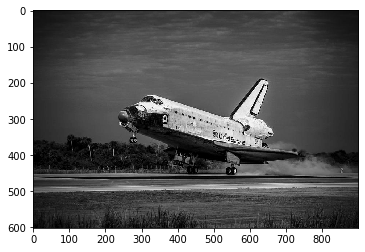

In [19]:
plt.imshow(img, cmap='gray');

In [20]:
img_arr = np.array(img)
img_arr_resh = img_arr.reshape(1, 602, 900, 1)
img_arr.shape, img_arr_resh.shape

((602, 900), (1, 602, 900, 1))

In [21]:
np.random.seed(42) 
tf.random.set_seed(42)
model = Sequential()
model.add(Conv2DTranspose(1, (2,2), strides=(2,2), input_shape=(602, 900, 1), use_bias=False))

In [22]:
ct_layer = model.layers[0]

Let's set weights for `1.` for simplicity.

In [23]:
ct_layer.set_weights([np.array([1, 1, 1, 1]).reshape(2, 2, 1, 1)])

In [24]:
W = ct_layer.get_weights()

In [25]:
type(W), len(W), W[0].shape

(list, 1, (2, 2, 1, 1))

In [26]:
W_resh = W[0].reshape(2, 2)
W_resh

array([[1., 1.],
       [1., 1.]], dtype=float32)

In [27]:
y = model.predict(img_arr_resh)

In [28]:
y.shape

(1, 1204, 1800, 1)

So we doubled image shape as expected. Let's now check if multiplication rule that we checked in the simple case holds here.

In [29]:
y_resh = y.reshape(1204, 1800)

In [35]:
img_arr[7:10, 6:11]

array([[16, 16, 16, 16, 16],
       [17, 17, 18, 18, 18],
       [17, 17, 18, 18, 18]], dtype=uint8)

In [37]:
y_resh[14:20, 12:22]

array([[16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [17., 17., 17., 17., 18., 18., 18., 18., 18., 18.],
       [17., 17., 17., 17., 18., 18., 18., 18., 18., 18.],
       [17., 17., 17., 17., 18., 18., 18., 18., 18., 18.],
       [17., 17., 17., 17., 18., 18., 18., 18., 18., 18.]], dtype=float32)